In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load McDonald's dataset (assumes it's saved locally)
df = pd.read_csv("mcdonalds.csv")

# View column names
print(df.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [2]:
df.shape


(1453, 15)

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


## EXPLORATING DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [7]:
# Identify numeric and categorical columns
numeric_features = df.select_dtypes(exclude='object').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Print summary
print(f"Numeric Features ({len(numeric_features)}): {numeric_features}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")


Numeric Features (1): ['Age']
Categorical Features (14): ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']


In [8]:
# separate binary and multi-class categorical features
binary_categoricals = [feature for feature in categorical_features if df[feature].nunique() == 2]
multi_class_categoricals = [feature for feature in categorical_features if df[feature].nunique() > 2]

print('\nOut of {} categorical features:'.format(len(categorical_features)))
print('  - {} are binary: {}'.format(len(binary_categoricals), binary_categoricals))
print('  - {} are multi-class: {}'.format(len(multi_class_categoricals), multi_class_categoricals))


Out of 14 categorical features:
  - 12 are binary: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']
  - 2 are multi-class: ['Like', 'VisitFrequency']


## categorical encoding for segmenttion


In [9]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("Encoded DataFrame shape:", df_encoded.shape)

Encoded DataFrame shape: (1453, 28)


In [10]:
df_new = df.iloc[:, 0:11]                 # select first 11 columns which are related to segmentation
df_binary_encoded = (df_new== "Yes").astype(int) #converting "Yes" to 1, "No" to 0 for performing segmentation

In [11]:
df_binary_encoded

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [12]:
# Compute column means
col_means = np.round(df_binary_encoded.mean(axis=0), 2) # Changed MD_x to df_binary_encoded
print(dict(zip(df.columns[:11], col_means)))


{'yummy': 0.55, 'convenient': 0.91, 'spicy': 0.09, 'fattening': 0.87, 'greasy': 0.53, 'fast': 0.9, 'cheap': 0.6, 'tasty': 0.64, 'expensive': 0.36, 'healthy': 0.2, 'disgusting': 0.24}


## ANOTHER WAY OF EXPLORATING DATA

In [13]:
# Principal Component Analysis
pca = PCA()
MD_pca = pca.fit(df_binary_encoded) # Changed MD_x to df_binary_encoded

std_devs = np.round(np.sqrt(pca.explained_variance_), 4)
prop_var = np.round(pca.explained_variance_ratio_, 4)
cum_prop_var = np.round(np.cumsum(prop_var), 5)

In [14]:
# Create PCA summary DataFrame
summary_df = pd.DataFrame({
    'Standard Deviation': std_devs,
    'Proportion of Variance': prop_var,
    'Cumulative Proportion': cum_prop_var
}, index=[f'PC{i+1}' for i in range(len(std_devs))])

print(summary_df)

      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1               0.7570                  0.2994                 0.2994
PC2               0.6075                  0.1928                 0.4922
PC3               0.5046                  0.1330                 0.6252
PC4               0.3988                  0.0831                 0.7083
PC5               0.3374                  0.0595                 0.7678
PC6               0.3103                  0.0503                 0.8181
PC7               0.2897                  0.0438                 0.8619
PC8               0.2751                  0.0395                 0.9014
PC9               0.2653                  0.0368                 0.9382
PC10              0.2488                  0.0324                 0.9706
PC11              0.2369                  0.0293                 0.9999


In [15]:
import patsy
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [16]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_binary_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,0.476933,-0.363790,0.304444,0.055162,0.307535,-0.170738,-0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,-0.142425,-0.277608,0.347830,-0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,0.197619,-0.070620,0.355087,0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,-0.354139,0.073405,0.406515,-0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,0.253960,-0.361399,-0.209347,0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,-0.097363,-0.107930,0.594632,-0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,0.118958,0.128973,0.103241,-0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,-0.002547,0.210899,0.076914,0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,0.067816,0.003125,0.261342,-0.068385,-0.029539,-0.066996,-0.454399,0.490069


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

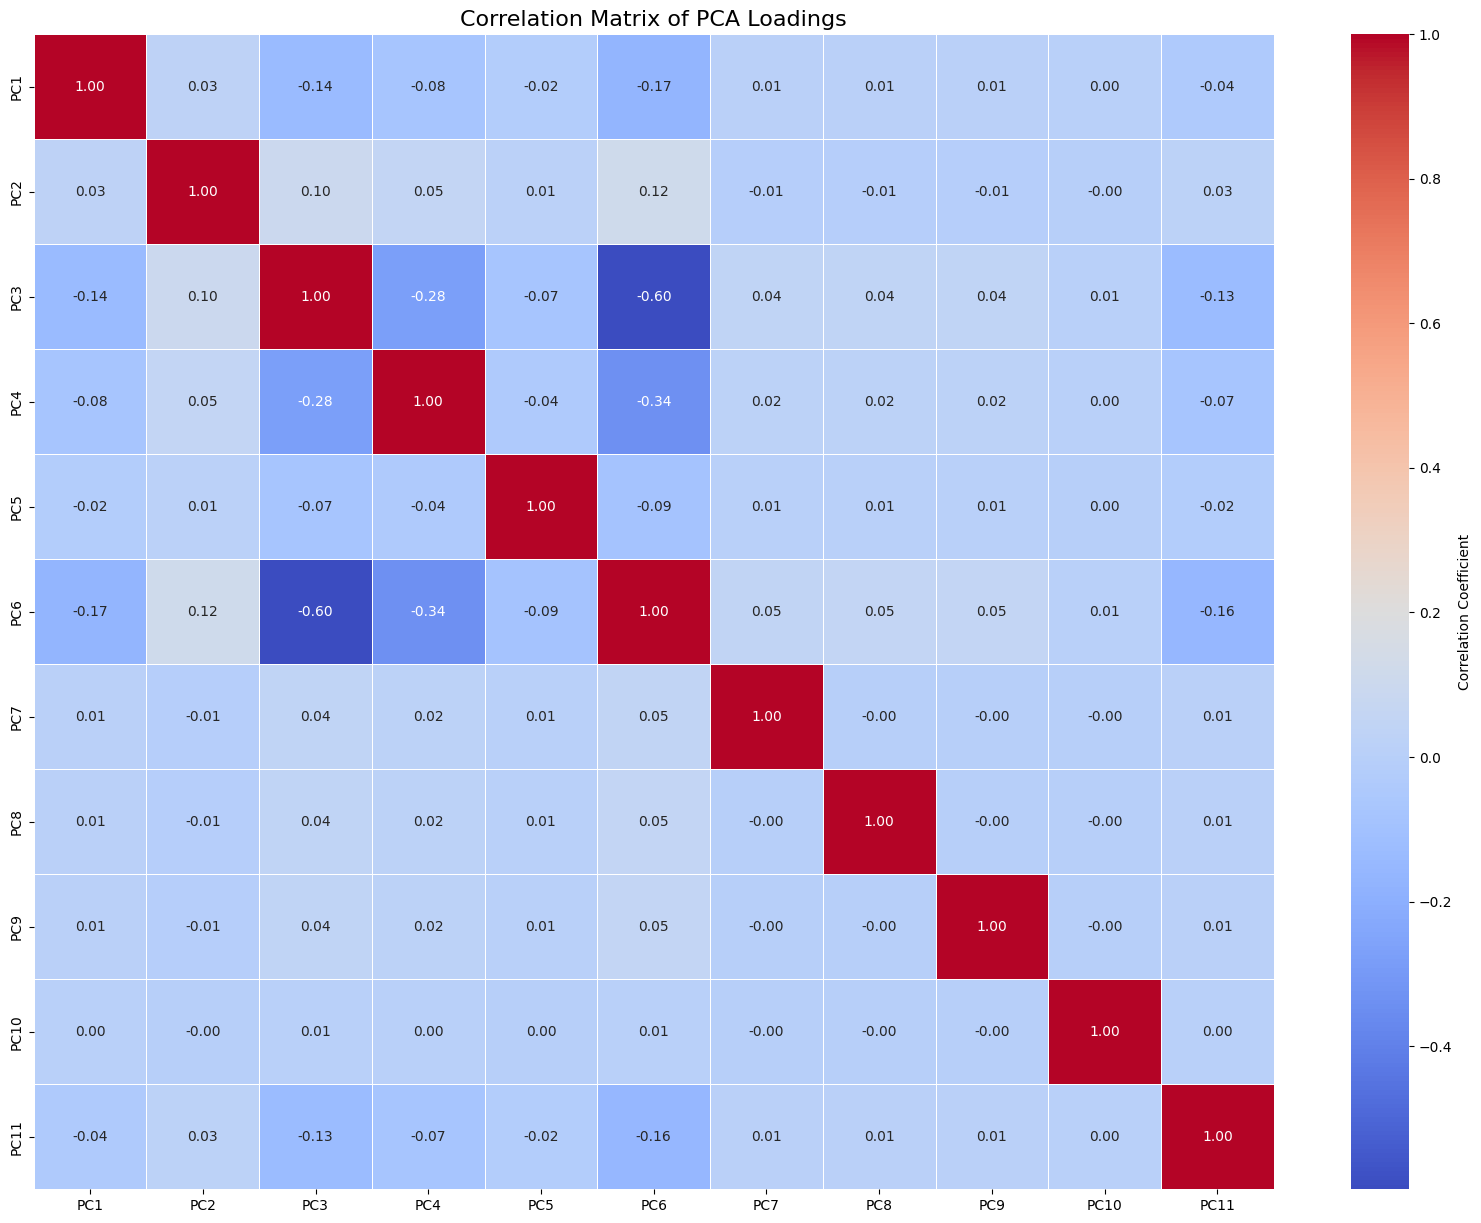

In [18]:
# Calculate the correlation matrix
correlation_matrix = loadings_df.corr()

# Set the figure size
plt.figure(figsize=(20, 15))

# Create the heatmap with proper annotations and color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5)

# Add a title for context
plt.title("Correlation Matrix of PCA Loadings", fontsize=16)

# Show the plot
plt.show()


In [19]:
# Get PCA scores (transformed data)
pca_scores = pca.transform(df_binary_encoded) # Changed MD_x to df_binary_encoded

# Create a DataFrame for PCA scores
pca_scores_df = pd.DataFrame(pca_scores, columns=[f'PC{i+1}' for i in range(pca_scores.shape[1])])

# Display the PCA scores DataFrame
print(pca_scores_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.425367  0.219079 -0.663255 -0.401300 -0.201705  0.389767 -0.211982   
1     0.218638 -0.388190  0.730827 -0.094724 -0.044669  0.086596 -0.095877   
2    -0.375415 -0.730435  0.122040  0.692262 -0.839643  0.687406  0.583112   
3     0.172926  0.352752  0.843795  0.206998  0.681415  0.036133 -0.054284   
4    -0.187057  0.807610 -0.028537  0.548332 -0.854074  0.097305 -0.457043   
...        ...       ...       ...       ...       ...       ...       ...   
1448 -1.550242 -0.275031  0.013737  0.200604  0.145063 -0.306575 -0.075308   
1449  0.957339 -0.014308 -0.303843  0.444350  0.133690 -0.381804 -0.326432   
1450  0.185894 -1.062662 -0.220857 -0.467643  0.187757  0.192703 -0.091597   
1451  1.182064  0.038570 -0.561561  0.701126 -0.047645 -0.193687 -0.027335   
1452 -1.550242 -0.275031  0.013737  0.200604  0.145063 -0.306575 -0.075308   

           PC8       PC9      PC10      PC11  
0    -0.163235 -

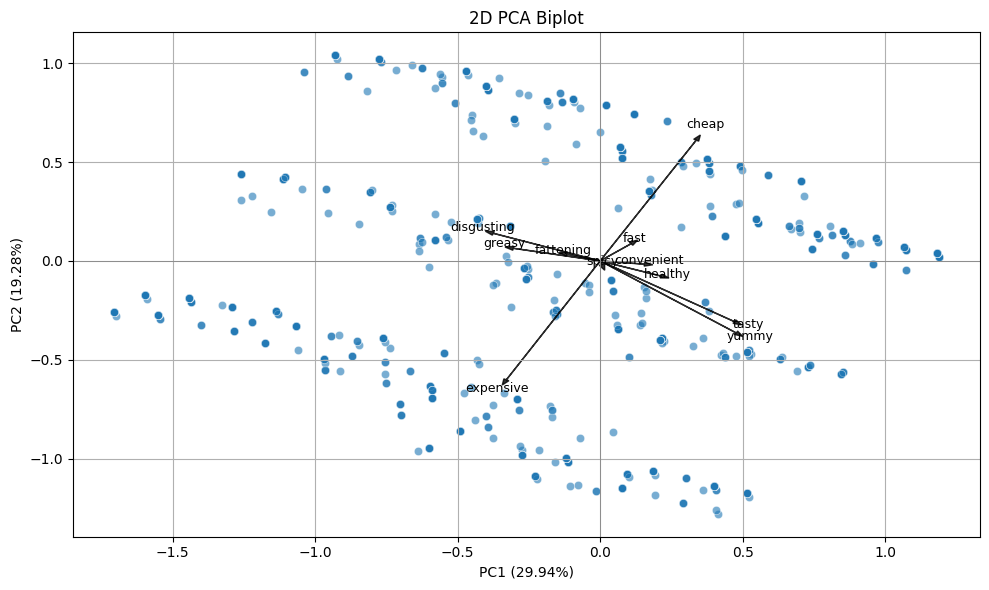

In [28]:
# PCA scores and loadings
scores = pca.transform(df_binary_encoded) # Changed MD_x to df_binary_encoded
loadings = pca.components_.T
features = df_binary_encoded.columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1], alpha=0.6)
# Arrows for loadings
for i, feature in enumerate(features):
    x, y = loadings[i, 0], loadings[i, 1]
    plt.arrow(0, 0, x, y, color='black', head_width=0.02, alpha=0.8)
    plt.text(x*1.1, y*1.1, feature, color='black', ha='center', fontsize=9)

# Axis labels and title
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('2D PCA Biplot')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

## DATA CLEANING

In [21]:
print("\nChecking for implausible values in Age (0-110):")
print(df[df['Age'] < 0])  # Check for negative ages
print(df[df['Age'] > 110]) 


Checking for implausible values in Age (0-110):
Empty DataFrame
Columns: [yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting, Like, Age, VisitFrequency, Gender]
Index: []
Empty DataFrame
Columns: [yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting, Like, Age, VisitFrequency, Gender]
Index: []


In [22]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [23]:
# renaming the category of like to be proper data format
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

In [24]:
# 1. Convert 'Yes'/'No' to 1/0
yes_no_cols = df.columns[:11]
df[yes_no_cols] = df[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# 2. Convert 'Like' to numeric
df['Like'] = df['Like'].str.replace('+', '', regex=False).astype(int)

# 3. Encode 'Gender'
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# 4. Encode 'VisitFrequency' (ordered)
visit_map = {
    "Every three months": 1,
    "Once a month": 2,
    "Once a week": 3
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_map)

# Final cleaned DataFrame
print(df)


      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  
0             1        0           0    -3   61  

C:\Users\pradn\AppData\Local\Temp\ipykernel_29668\1454178536.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[yes_no_cols] = df[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


In [25]:
df['Like'].value_counts()

Like
 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64

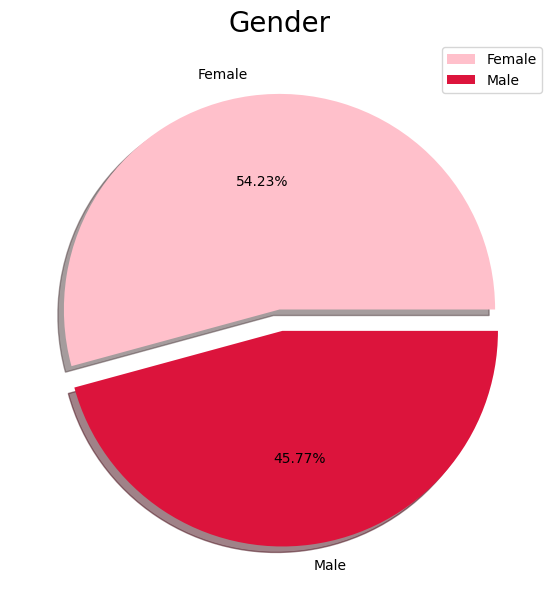

In [26]:
# Demographic segmentation using 'Age' & 'Gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

C:\Users\pradn\AppData\Local\Temp\ipykernel_29668\4087520473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data = sns.countplot(x=df['Age'], palette = 'viridis')


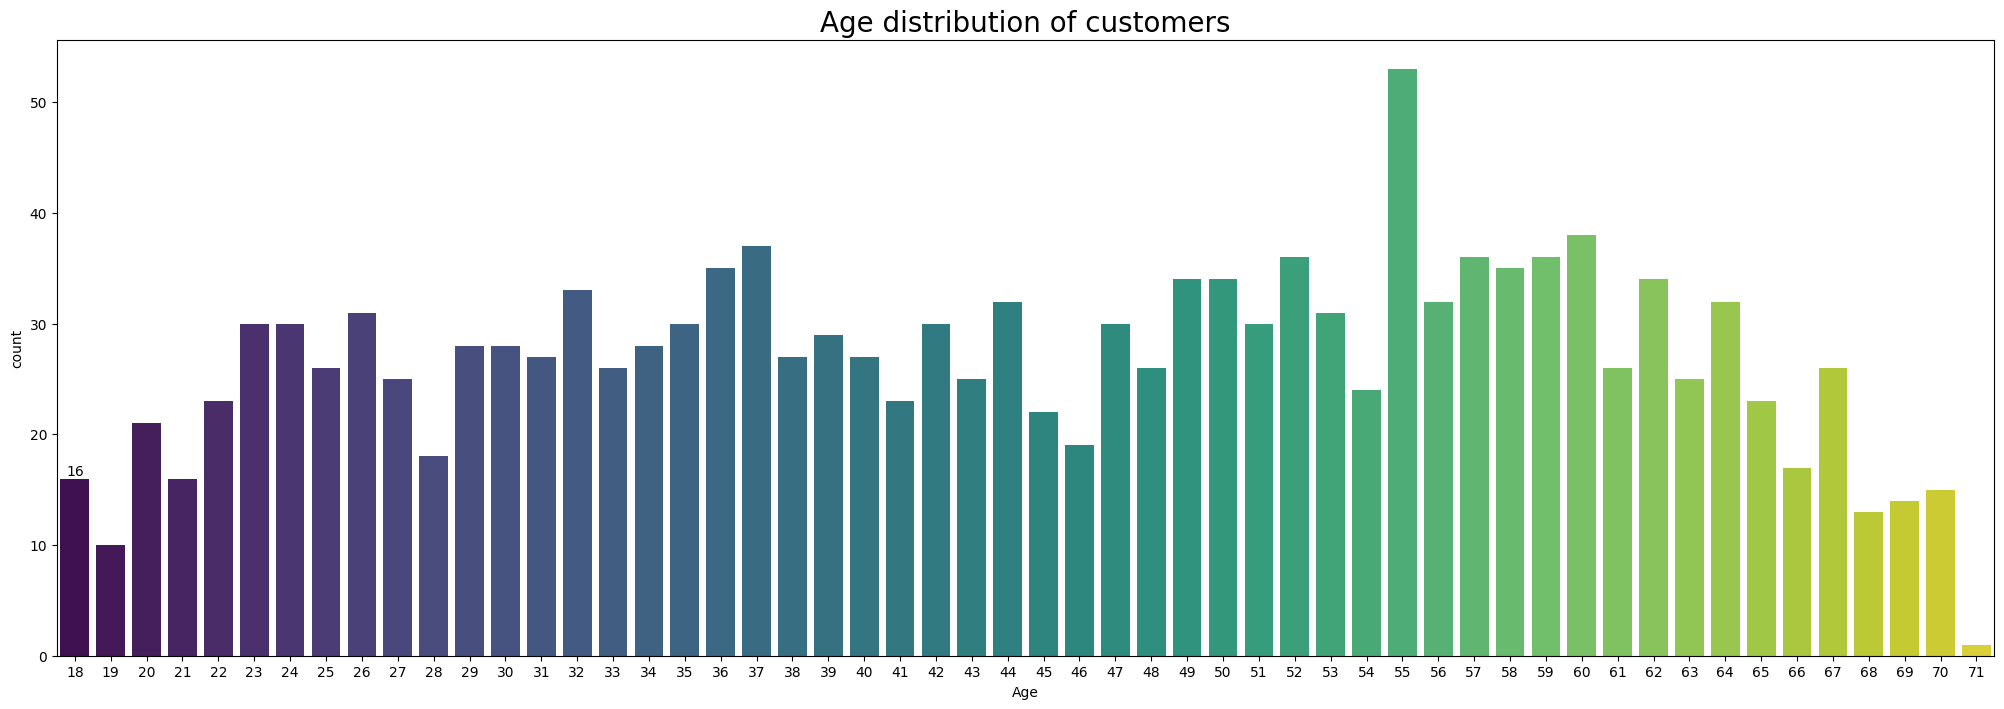

In [27]:
# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Age'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

C:\Users\pradn\AppData\Local\Temp\ipykernel_29668\705862794.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'}, inplace=True)
C:\Users\pradn\AppData\Local\Temp\ipykernel_29668\705862794.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


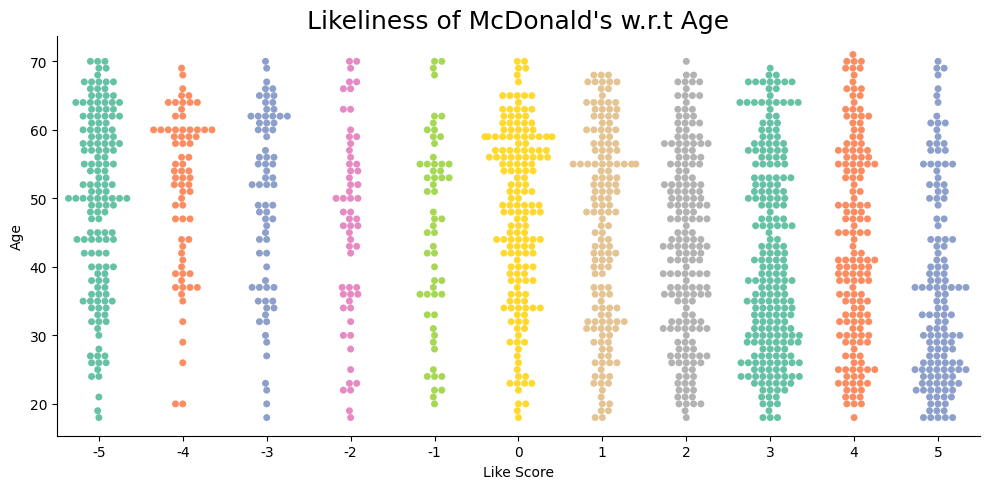

In [29]:
# Psychographic segmentation using 'Like'

# Clean 'Like' values (more efficient with inplace=True)
df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'}, inplace=True)

# Plotting the results with slight improvements
sns.catplot(
    data=df,
    x="Like",
    y="Age",
    kind="swarm",
    height=5,
    aspect=2,
    palette="Set2"
)

plt.title('Likeliness of McDonald\'s w.r.t Age', fontsize=18)
plt.xlabel('Like Score')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

## EXTRACTING SEGMENTS USING K-MEANS

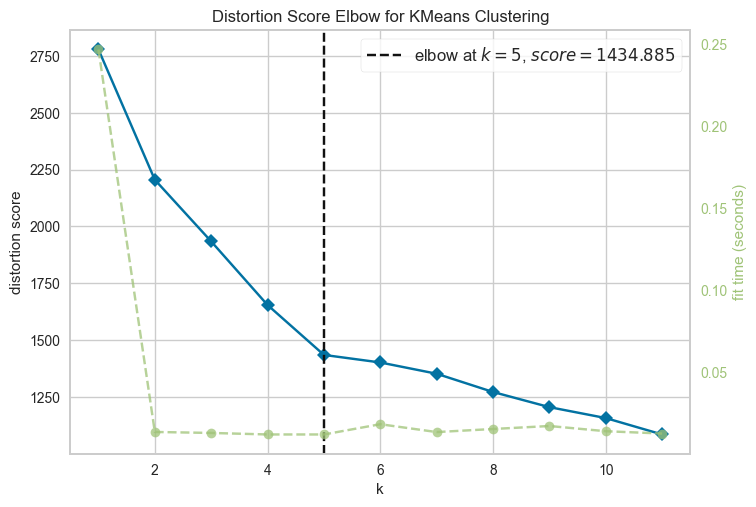

In [36]:
# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_binary_encoded)
visualizer.show();

In [40]:
# k-means clustering
from collections import Counter 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_binary_encoded)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [0 3 1 ... 1 3 1]
WCSS: 1748.9687521158028
No. of iterations:  9
Cluster centroids:  [[2.70270270e-02 8.47972973e-01 6.08108108e-02 9.05405405e-01
  6.11486486e-01 9.29054054e-01 8.41216216e-01 6.66133815e-16
  5.40540541e-02 8.10810811e-02 4.45945946e-01]
 [5.11627907e-01 8.43551797e-01 9.30232558e-02 9.06976744e-01
  6.19450317e-01 8.01268499e-01 2.11416490e-02 5.60253700e-01
  9.83086681e-01 1.33192389e-01 3.46723044e-01]
 [0.00000000e+00 9.61832061e-01 1.37404580e-01 8.70229008e-01
  5.19083969e-01 9.38931298e-01 8.39694656e-01 1.00000000e+00
  5.34351145e-02 1.45038168e-01 1.75572519e-01]
 [1.00000000e+00 9.81916817e-01 1.01265823e-01 8.11934901e-01
  4.03254973e-01 9.60216998e-01 9.05967450e-01 9.76491863e-01
  5.78661844e-02 3.30922242e-01 6.14828210e-02]]
Cluster size:  Counter({3: 553, 1: 473, 0: 296, 2: 131})


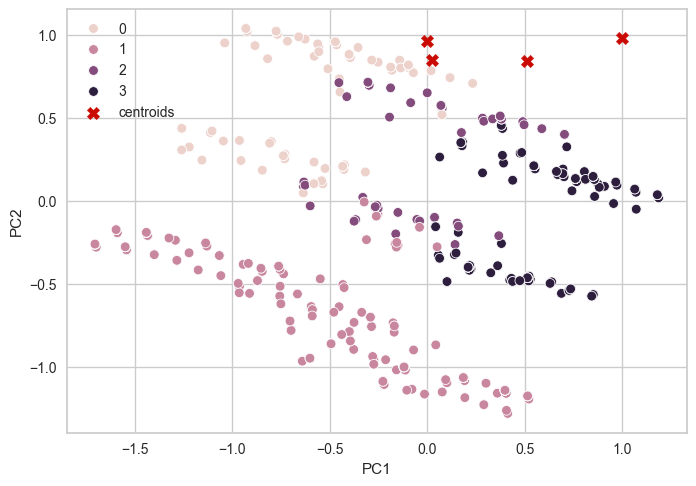

In [41]:
# cluster visualization
sns.scatterplot(data=pca_scores_df, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [42]:
# renaming the category of like to be proper data format
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

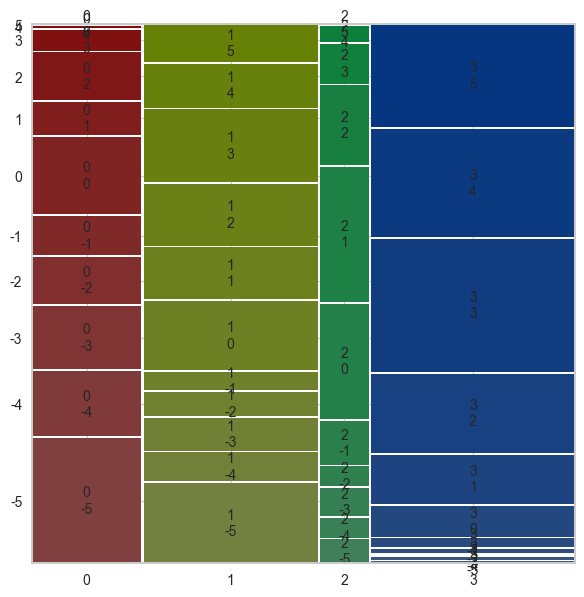

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,71,37,36,27,22,44,19,27,12,1,0
1,73,26,30,22,16,63,47,56,66,40,34
2,6,5,7,5,11,29,34,20,10,4,0
3,2,3,0,5,9,33,52,84,141,115,109


None

In [43]:
# crosstab creation
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Get the actual column names from the crosstab
like_categories = crosstab.columns.tolist()

# Use the actual column names to select them
crosstab = crosstab[like_categories] 

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)

# Assuming 'mosaic' is from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

mosaic(crosstab.stack())
display(crosstab, plt.show())

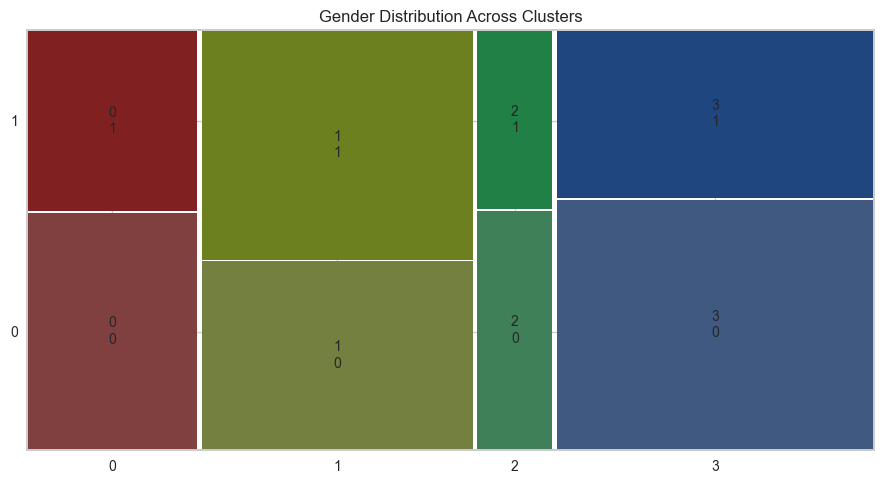

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,71,37,36,27,22,44,19,27,12,1,0
1,73,26,30,22,16,63,47,56,66,40,34
2,6,5,7,5,11,29,34,20,10,4,0
3,2,3,0,5,9,33,52,84,141,115,109


None

In [44]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Crosstab creation
crosstab_gender = pd.crosstab(df['cluster_num'], df['Gender'])

# Mosaic plot
plt.rcParams['figure.figsize'] = (9, 5)
mosaic(crosstab_gender.stack(), title='Gender Distribution Across Clusters')
plt.tight_layout()
plt.show()
display(crosstab, plt.show())


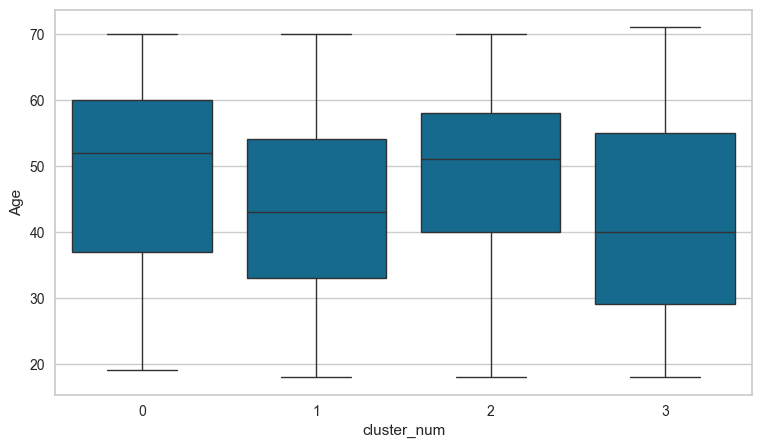

In [45]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=df);

In [46]:
# calculating the mean of 'VisitFrequency'
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,1.972973
1,1,1.526427
2,2,1.442748
3,3,1.311031


In [47]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.060811
1,1,5.143763
2,2,5.213740
3,3,7.905967


In [48]:
# calculating the mean of 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [49]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.432432,3.060811,1.972973
1,1,0.547569,5.143763,1.526427
2,2,0.427481,5.213740,1.442748
3,3,0.401447,7.905967,1.311031


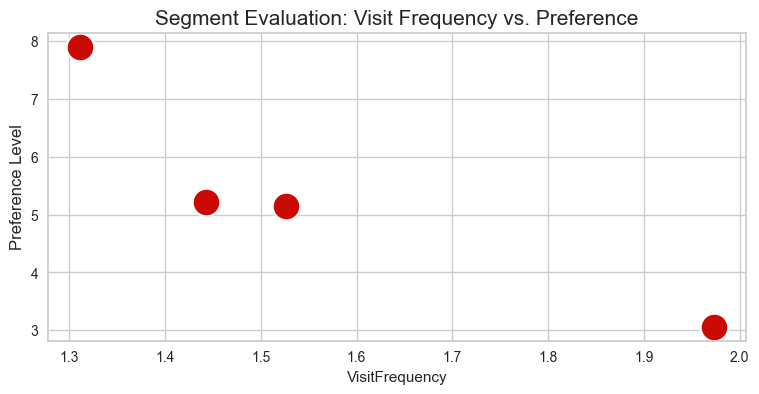

In [50]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")

# Set the title and labels
plt.title("Segment Evaluation: Visit Frequency vs. Preference", fontsize=15) 
plt.ylabel("Preference Level", fontsize=12)  # More descriptive y-axis label

# Display the plot
plt.show()